In [10]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [11]:
matplotlib.rc('font', family = 'Malgun Gothic')
df_total = pd.read_csv("data/merged_data_total.csv")
df_back = pd.read_csv("data/merged_data_backend.csv")
df_front = pd.read_csv("data/merged_data_frontend.csv")

In [12]:
def draw_bar(data, df_name):
    figure, ax = plt.subplots()
    figure.set_size_inches(18,10)

    #위에 만든 df의 column 하나씩 그래프로 그리기
    colors = sns.color_palette("hls", len(data.index))
    ax = sns.barplot(x = data.values, y = data.index, hue = data.index, palette = colors, ax = ax, dodge=False) # dodge=False 추가
    ax.set_title(df_name, fontsize=20)
    ax.set_ylabel('')
    ax.legend(data.index, ncol=2, loc='lower right', labelcolor=colors, fontsize=16)

    #각 bar 위에 해당하는 숫자를 넣기기
    max_value = max(data.values)
    for j, (x_val, y_val) in enumerate(zip(data.index, data.values)):
        ax.text(x = y_val + max_value*0.02, y = j, s = f'{y_val:.0f}', ha = 'center', va = 'center', fontsize = 12, color = colors[j])
    plt.show()

In [13]:
def autopct_func(pct):
    return f'{pct:.1f}%'

def draw_circle(data, df_name):
    figure, ax = plt.subplots()
    figure.set_size_inches(20,10)

    colors = sns.color_palette("hls", len(data.index))

    # 원형 그래프 그리기 autopct=비율 표시, pctdistance=중앙으로부터 pct거리, startangle=시작 각도
    autotexts = ax.pie(data.values, labels=data.index, colors=colors, autopct=autopct_func, pctdistance=0.8,\
                        startangle=90, rotatelabels=False, textprops={'fontsize': 12}) # rotatelabels=False, labels=data.index 추가
    # 범례 위치 조정 및 겹침 방지
    ax.legend(data.index, ncol=3, loc='lower left', bbox_to_anchor=(0.0, 0.0), fontsize=10)
    ax.set_title(df_name, fontsize=20, x=0.5, y=1.05) # 제목 위치 중앙으로 조정
    ax.axis('equal')   # 원이 찌그러지지 않게 1:1비율 고정

    plt.tight_layout(rect=[0, 0.05, 1, 0.95]) # 범례와 제목이 겹치지 않도록 레이아웃 조정
    plt.show()


In [14]:
# skill row의 키워드 개수 count
def count_skills(df, exclude_skills=None):
    skill_counts = Counter()
    for index, row in df.iterrows():
        skills_str = row['skill']
        if pd.notna(skills_str):
            skills = [skill.strip().upper() for skill in skills_str.split(',')]
            skill_counts.update(skills)

    if exclude_skills:
        exclude_skills_upper = [skill.upper() for skill in exclude_skills]
        skill_counts = {skill: count for skill, count in skill_counts.items() if skill not in exclude_skills_upper}

    return pd.Series(skill_counts).sort_values(ascending=False)

In [15]:
# 제외할 스킬 목록 정의
excluded_skills = ['AI', 'UI', 'UIUX', 'NATIVE', 'BOOT', 'API', 'WEB', 'SW']

# total_skill_counts = count_skills(df_front, exclude_skills=excluded_skills)
# print("Total Skill Counts (after exclusion):")
# print(total_skill_counts.head(30)) # 상위 30개 정도 출력해서 확인

In [16]:
# position을 구분하지 않고 전체 detail데이터에서 키워드 세기
total_skill_counts = count_skills(df_total, exclude_skills=excluded_skills)

# 각 position별로 구분하여 detail데이터에서 키워드 세기
backend_skill_counts = count_skills(df_back, exclude_skills=excluded_skills)
frontend_skill_counts = count_skills(df_front, exclude_skills=excluded_skills)

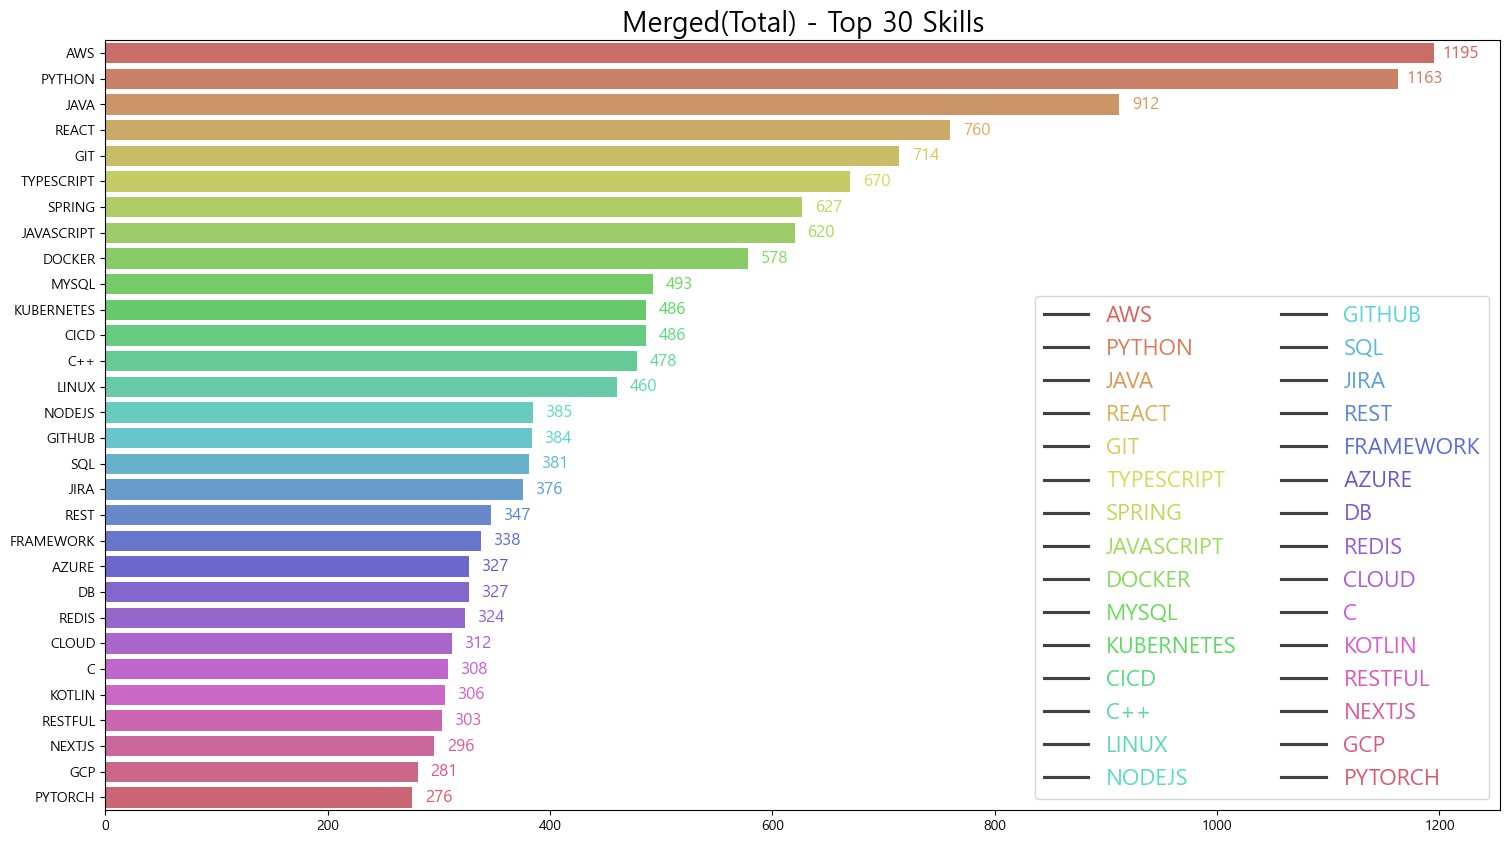

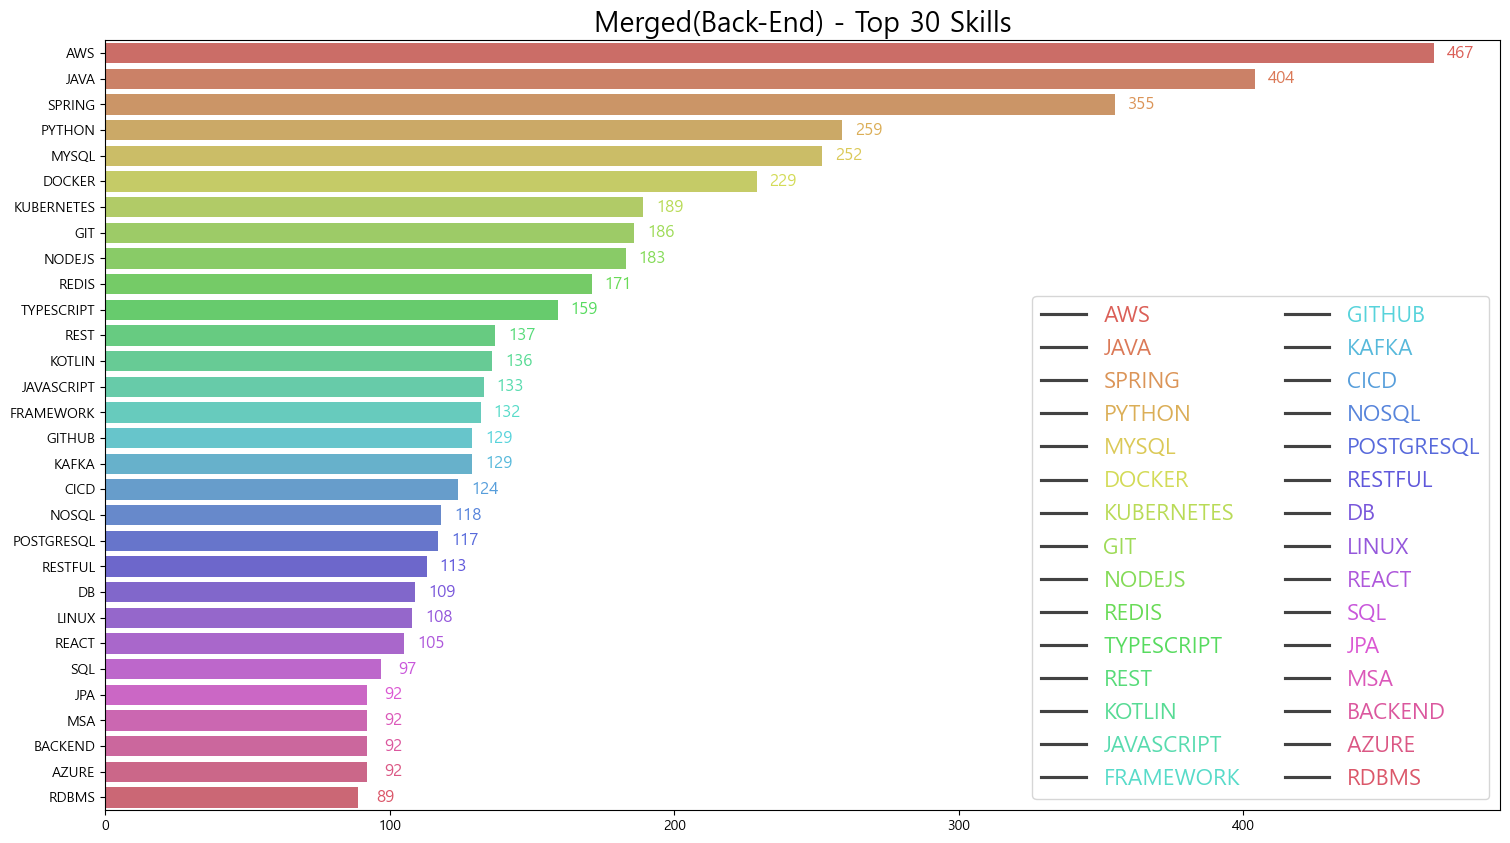

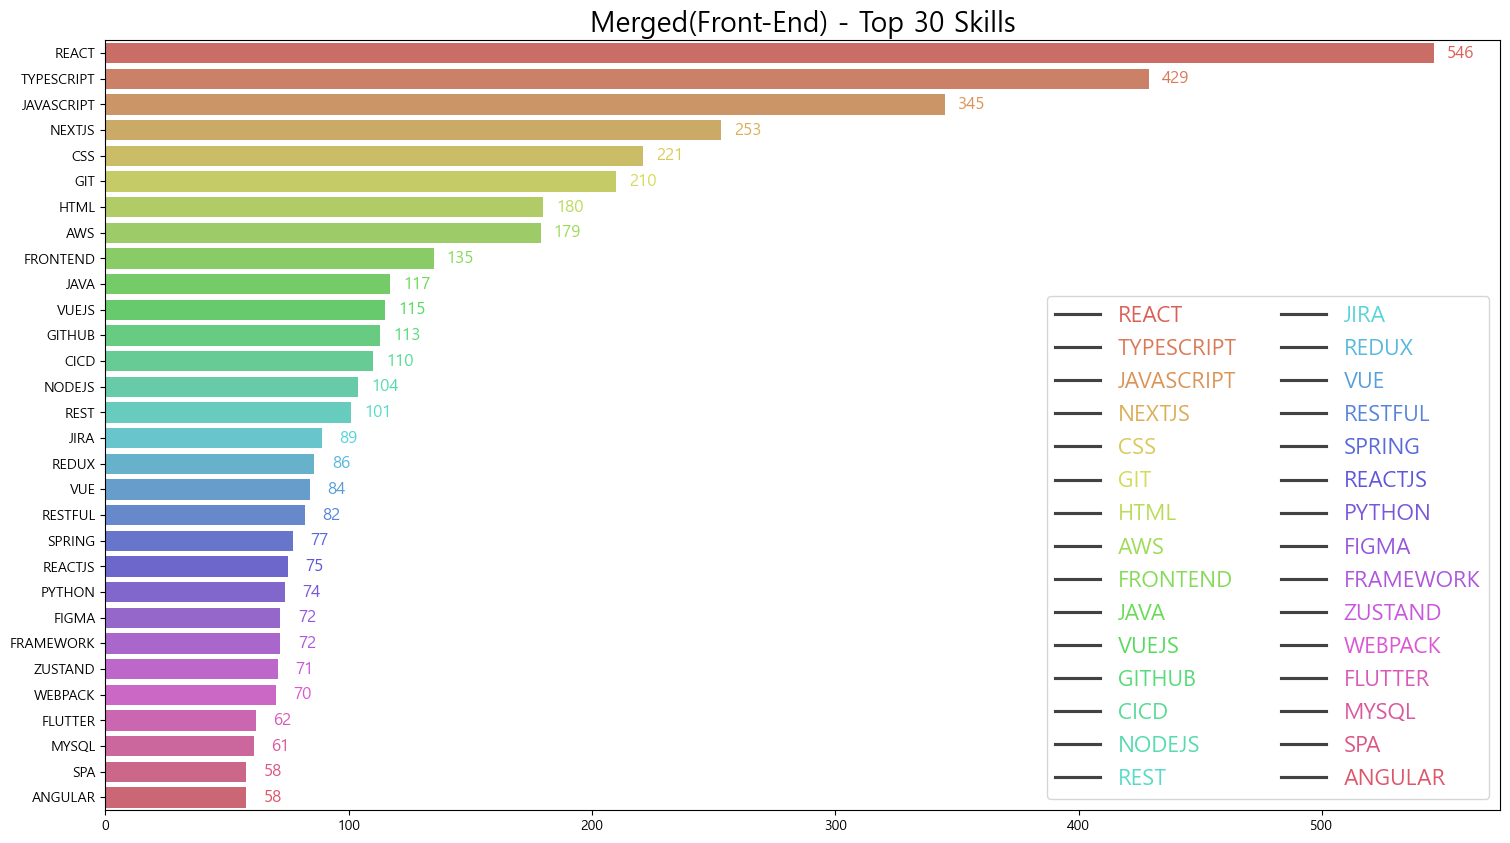

In [17]:
# 막대 그래프 그리기
draw_bar(total_skill_counts.head(30), 'Merged(Total) - Top 30 Skills')
draw_bar(backend_skill_counts.head(30), 'Merged(Back-End) - Top 30 Skills')
draw_bar(frontend_skill_counts.head(30), 'Merged(Front-End) - Top 30 Skills')

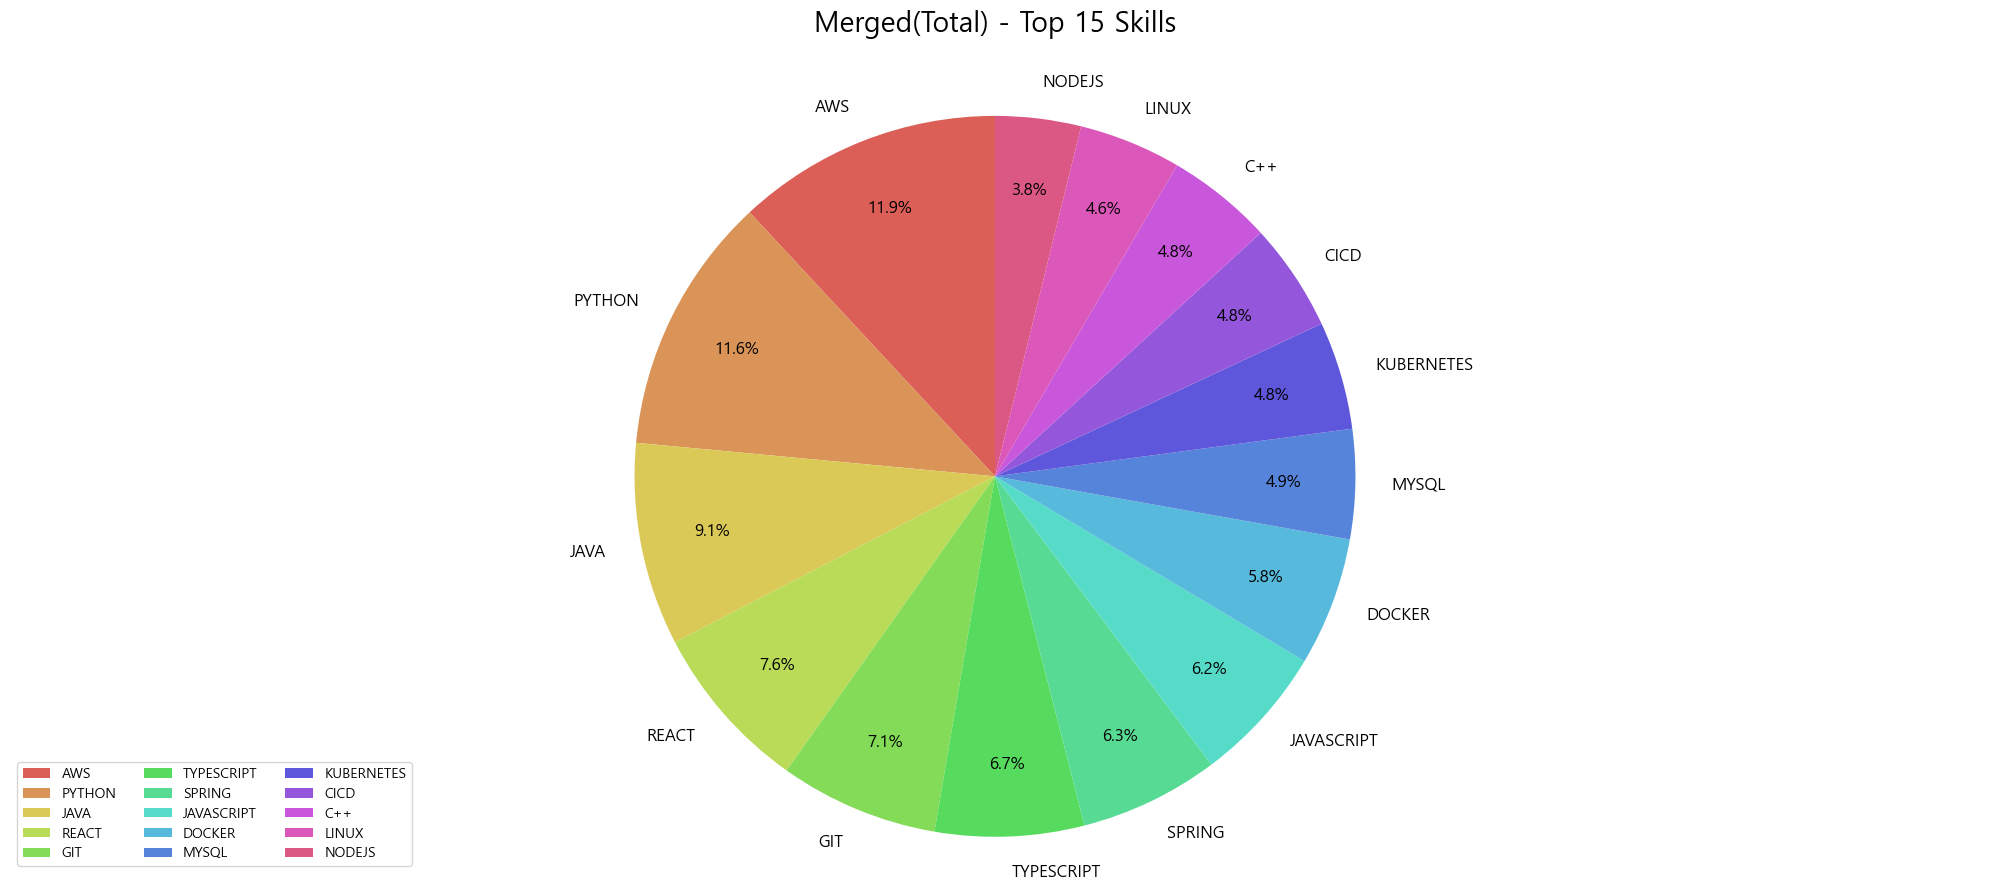

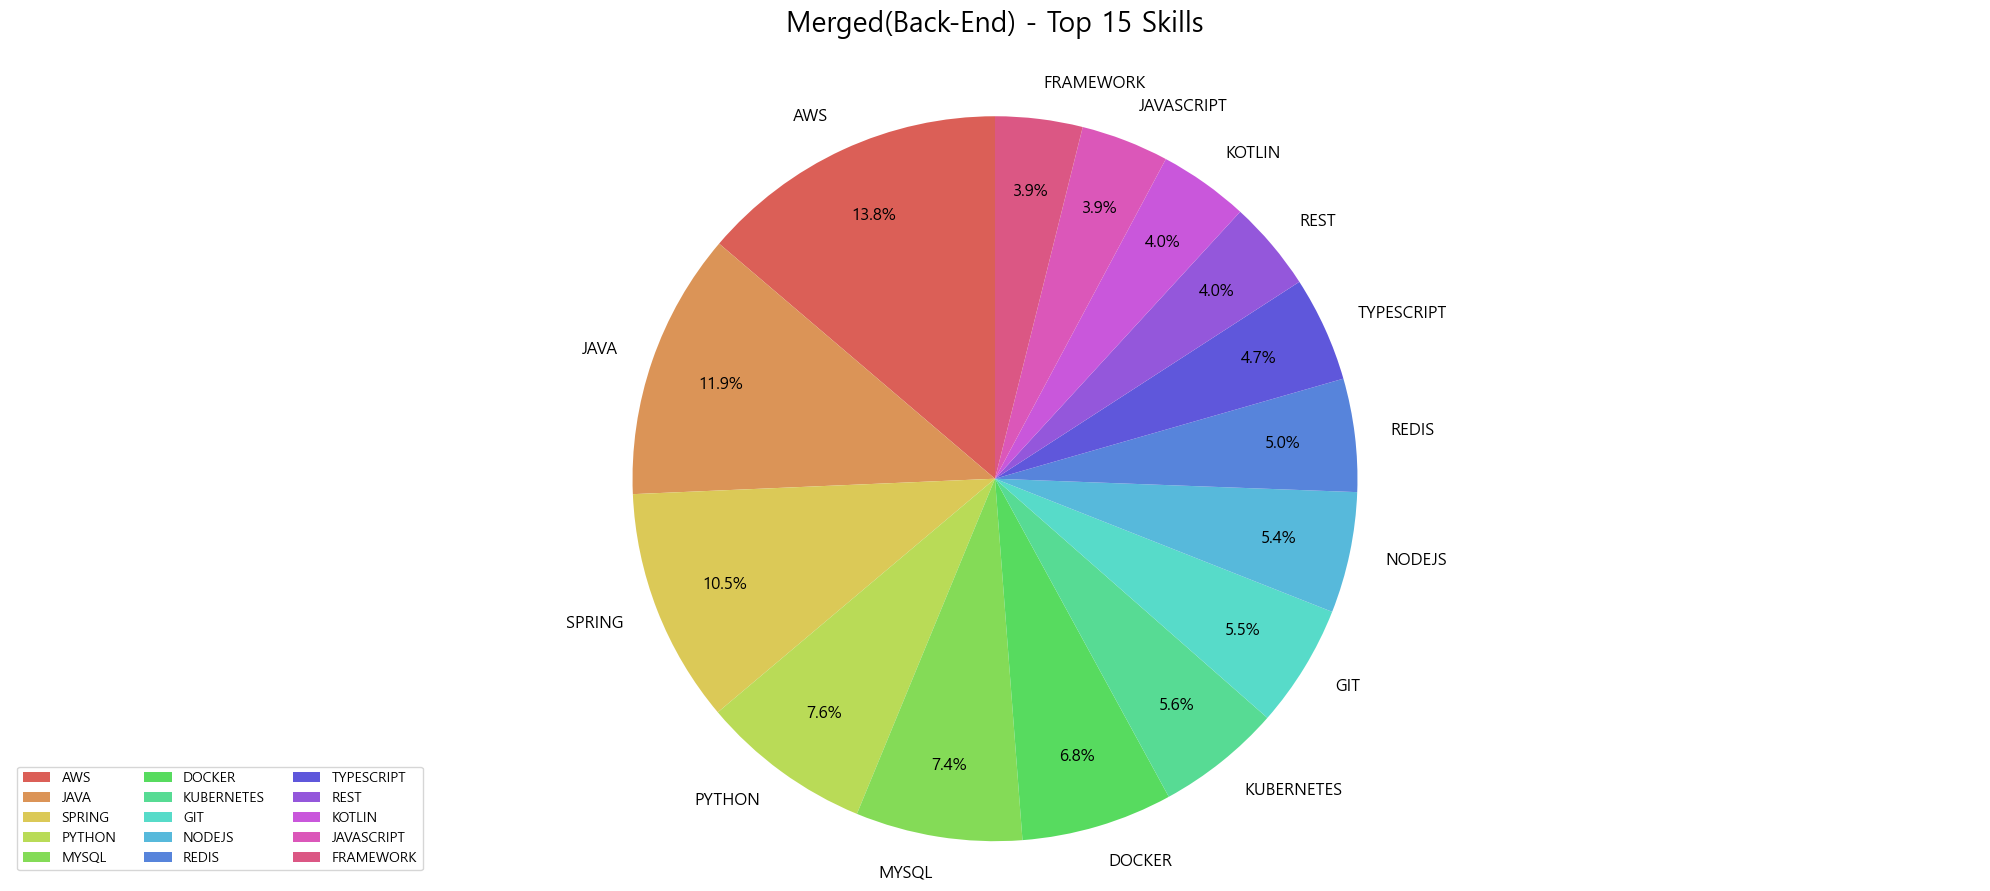

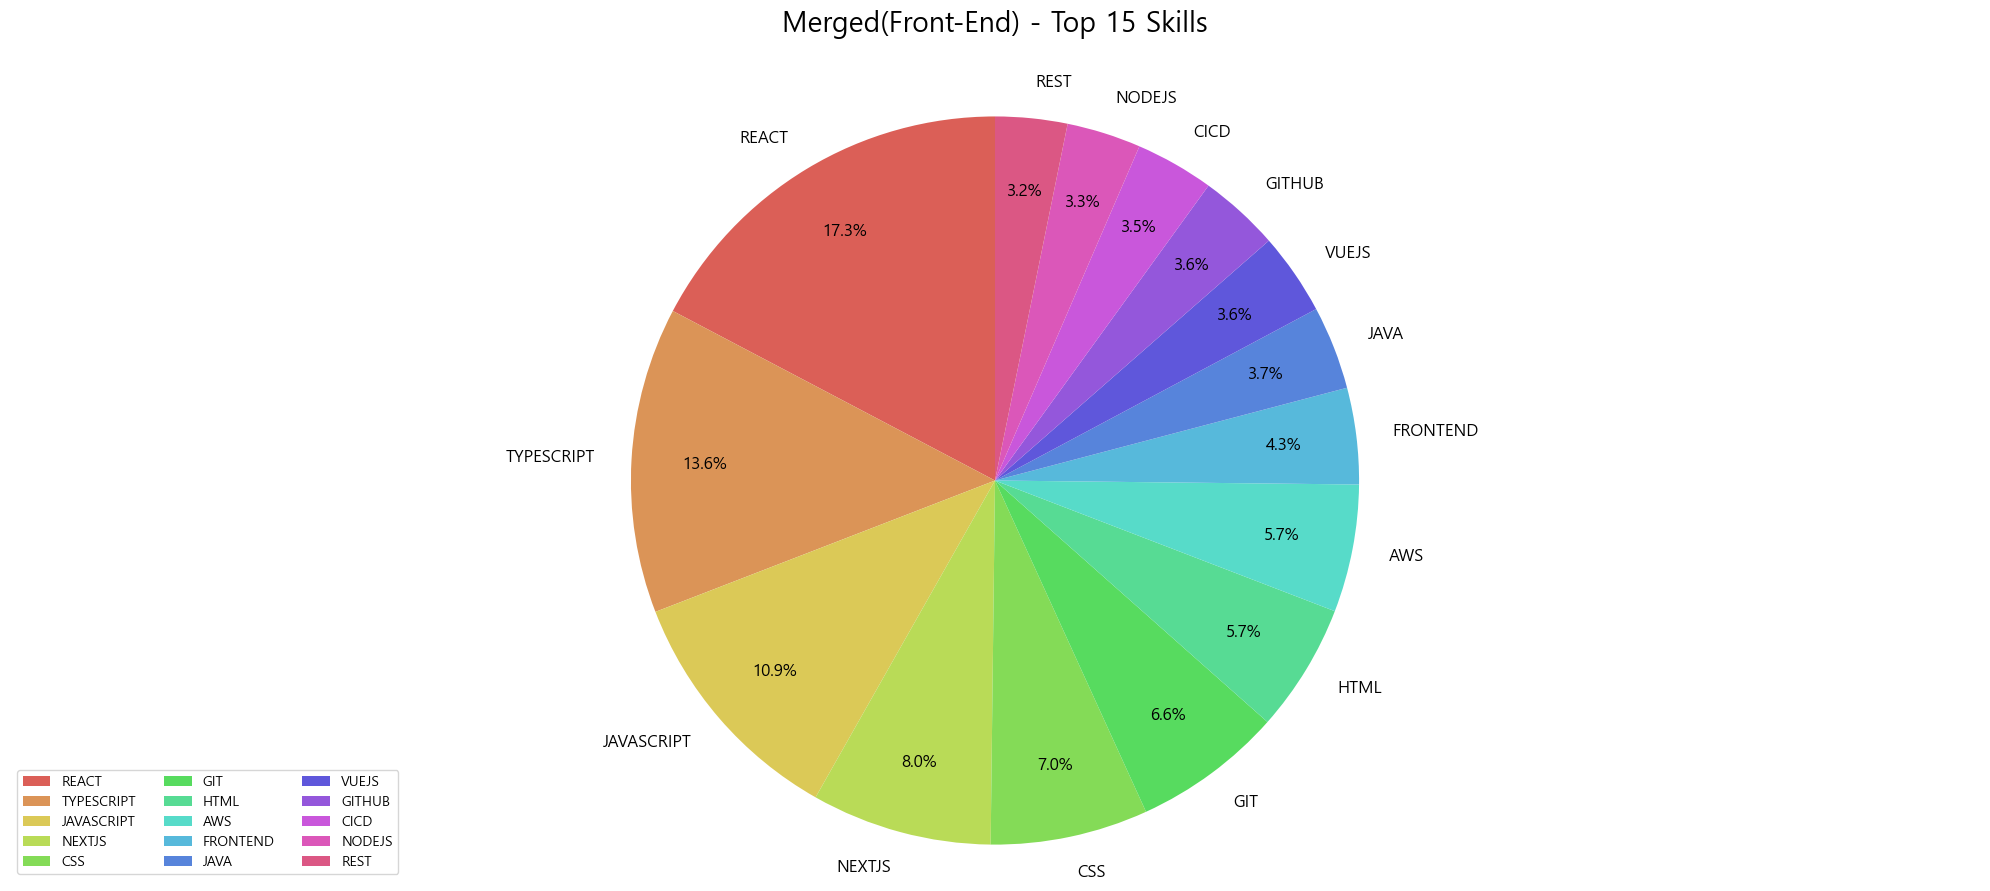

In [18]:
# 원형 그래프 그리기
draw_circle(total_skill_counts.head(15), 'Merged(Total) - Top 15 Skills') # 원형 그래프는 항목 수가 너무 많으면 가독성이 떨어지므로 상위 15개만 표시
draw_circle(backend_skill_counts.head(15), 'Merged(Back-End) - Top 15 Skills')
draw_circle(frontend_skill_counts.head(15), 'Merged(Front-End) - Top 15 Skills')